# IST256 Project Deliverable 3 (P3)

## Phase 3: Implementation (26 of 52 points)

**IMPORTANT:** PLEASE READ THIS ENTIRE NOTEBOOK BEFORE STARTING YOUR WORK!

It time to turn in the the finished product, 3 Steps:

1. Restate your idea
2. Place all your project code in cells below, and make sure it runs correctly. 
3. Your Comments

Don't forget to record in your journal each time you work on the project.


### Step 1: What is Your Idea, Again?

Remind us of your project again!

`--== Double-click and put the title or brief description of your project below  ==--`

The Cocktail Generator

This program will provide you with information on different cocktails and brewery locations. You can search drinks by name, by ingredient, or at random. It will then provide you with a picture of the drink, along with all measures on ingredients, and step by step instructions on how to make it. You also are given the option to search breweries by name or by state. This is a very user friendly program, so if you are not sure on any drink names or ingredients, you are given the option to look at available drink names and ingredients!

### Step 2: Project Code

Include all project code below. Make sure to execute your code to ensure it runs properly before you turn it in. We will be grading this code based on the following criteria:

- Is there clear code evidence which helps your evaluator determine how you got from original idea to the final implementation?
- It is expected that your code will execute as intended as solve the problem as stated.
- It is expected your code will be well written in a modular fashion, use aptly named objects, user defined functions for modularity (breaking up the code into smaller parts), and handle user errors  / bad input as appropriate.
- The programming style and idioms will match those you were taught in class. We should not see code outside of the style learned in IST256.
- Does the code clearly demonstrate what you have learned in the course and that you are capable of acquiring new programming skills and techniques independently ?
- Does your journal adequately reflect upon the work you’ve done?
- Will your code execute for the evaluator? Does it have everything they need in this notebook? HINT: Go to the control panel, click **Stop My Server**, then start your notebook back up and run your P3 code again to make sure it works in a clean notebook.
- Exceptional projects are awareded the highest number of points. Exceptional projects go above and beyond the expectations and normally incorporate several project references into the project.

Multiple cells are provided for your code below. Add more as appropriate.


In [3]:
# TODO Pip install any modules your project requires here Put your project code in cells below this one!
import requests
import json
from textwrap import fill
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [4]:
API = "https://www.thecocktaildb.com/api/json/v1/1"
#caches
drink_names = {}
full_drinks = {}
ingredients = []

pad = 80 #max output width
thumb_size = (2,2)
if __name__ =='main':...

In [5]:
def print_drink_details(drink):
    print()
    image_data = BytesIO(requests.get(drink['strDrinkThumb']).content)
    thumbnail = Image.open(image_data)
    plt.imshow(thumbnail)
    plt.axis('off')
    plt.gcf().set_size_inches(*thumb_size)
    plt.show()
    
    print(f"\nName: {drink['strDrink']} ({drink['strAlcoholic']})")
    print(f"Suggested Glass: {drink['strGlass']}")
    print("\nIngredients:")
    for i in range(1,16): 
        ingredient = drink[f'strIngredient{i}']
        if ingredient:
            measure = drink[f'strMeasure{i}']
            if measure:
                print(f"- {measure.strip()} {ingredient}")
            else:
                print(f"- {ingredient}")
        else:
            break
    print("\nInstructions:")
    for i, step in enumerate(drink['strInstructions'].split('.')[:-1],1):
        output = str(i) + '. '
        indent = ' ' * len(output)
        output += fill(step.strip(), pad, subsequent_indent = indent)
        print(output)

In [6]:
def get_info(x):
    return requests.get(f'{API}/list.php?{x}=list').json()

In [7]:
def at_random():
    drink = requests.get(f"{API}/random.php").json()['drinks'][0]
    print_drink_details(drink)

In [8]:
def print_drink_names():
    if not drink_names:
        for i in range(65,70): #goes up to 91 (z), 
            c = chr(i)
            try:
                
                result = requests.get(f"{API}/search.php?f={c}") #should add a try except here later
                drinks = result.json().get('drinks')
                if drinks:
                    drink_names[c] = [drink['strDrink'] for drink in drinks]
            except:
                print('Error: Invalid Drink Name')
                
    for c, drinks in drink_names.items():
        output = f'\n{c}:   '
        indent = ' ' * (len(output) - 1)
        output += fill(' | '.join(drinks), pad, subsequent_indent = indent)
        print(output)            

In [9]:
def by_name():
    entry = input('\nEnter drink name or 0 for drink names: ')
    if entry:
        if entry == '0':
            print_drink_names()
            drink_name = input('\nEnter drink name: ')
        else:
            drink_name = entry
        
        print('\nMixing Drinks...', end=' ')
        try:
            
            result = requests.get(f"{API}/search.php?s={drink_name}") #add try except probably later
            drinks = result.json()['drinks']
            print_drink_count(drinks)
            print_drinks(drinks)
        except:
            print('Error: Invalid Drink')

In [10]:
def by_ingredient():
    
    
    entry = input('\nEnter ingredient | Enter 0 for avaiable ingredients: ')
    if entry:
        if entry == '0':
            print('\nGathering ingredients...')
            print_ingredients()
            ingredient = input('\nEnter ingredient: ')
        else:
            ingredient = entry
            print('\nMixing Drinks...', end=' ')

    try:
        result = requests.get(f"{API}/filter.php?i={ingredient}") #try execpt
        drinks_no_info = result.json()['drinks'] #do not contain full info
        print_drink_count(drinks_no_info)
        drinks = []
        for drink in drinks_no_info:
            name = drink['strDrink']
            cache_drink(name)
            drinks.append(full_drinks[name])
    except:
        print('invalid')
        
    try:
        while True:
            entry = input('\nEnter another ingredient | Enter q to process: ')
            if entry == 'q':
                print_drinks(drinks)
                break
            else:
                if not ingredients:
                    cache_ingredients()
                if entry in ingredients:
                    print('\nMixing Drinks...', end=' ')
                    drinks = filter_by_ingredient(entry, drinks)
                    print_drink_count(drinks)
                else:
                    print('Not a valid ingredient.')
                    print_ingredients()
    except:
        print('Error: invalid')

In [11]:
def main():
    print('\n*** COCKTAIL GENERATOR ***')
    options = {'1': by_name, '2': by_ingredient, '3': at_random, '4': get_brewery}
    while True:
        print_menu(options)
        selection = input('\n-> ')
        if selection == 'q':
            print('\n*** GOODBYE ***\n')
            return
        if selection in options:
            options[selection]()

def print_menu(options):
    print('\nSelect an option:\n')
    print('1 - Drink by Name')
    print('2 - Drink by Ingredients')
    print('3 - Random Drink')
    print('4 - Brewery Info')
    print('q - Quit')

In [12]:
def get_brewery():
    url = "https://brianiswu-open-brewery-db-v1.p.rapidapi.com/breweries/search"
    keyword = ''
    while True:
        choice = input('1 = By Name | 2 - By State: ')
        if choice == '1':
            keyword = input('Enter name: ')
            break
        elif choice == '2':
            keyword = input('Enter state: ')
            break
    
    querystring = {"query": keyword}
    headers = {
        'x-rapidapi-key': "685d984fe6mshc94b85b3496c87cp188ef9jsne245d0a6bbbd",
        'x-rapidapi-host': "brianiswu-open-brewery-db-v1.p.rapidapi.com"
            }
    print('\nSearching Breweries...', end=' ')
    result = requests.get(url, headers=headers, params=querystring)
    breweries = result.json()
    print(f'found {len(breweries)} breweries: ')
    print_breweries(breweries)

In [13]:
def print_breweries(breweries):
    for brewery in breweries:
        name = brewery.get('name')
        if name:
            print('\n{:<14}{:<10}'.format("Name:", name))
        brewery_type = brewery.get('brewery_type')
        if brewery_type:
            print('{:<14}{:<10}'.format("Type:", brewery_type))
        address = brewery.get('address')
        if address:
            print('{:<14}{:<10}'.format("Address:", brewery['street']))
        city_state = brewery.get('city')
        if city_state:
            header = 'City'
            state = brewery.get('state')
            if state:
                header += "/State"
                city_state += ', ' + state
            print('{:<14}{:<10}'.format(header, city_state))
        zip_code = brewery.get('postal_code')
        if zip_code:
            print('{:<14}{:<10}'.format("Zip code:", zip_code))
        country = brewery.get('country')
        if country:
            print('{:<14}{:<10}'.format("Country:", country))
        num = brewery.get('phone')
        if num and any(digit in num for digit in '0123456789'):
            phone_number = f"({num[:3]}) {num[3:6]}-{num[6:]}"
            print('{:<14}{:<10}'.format("Phone:", phone_number))
        website = brewery.get('website_url')
        if website:
            print('{:<14}{:<10}'.format("Website:", website))
        
        if input('\nPress any key to continue | Enter q to quit: ') == 'q':
            break               

In [14]:
def filter_by_ingredient(ingredient, drink_list):
    filtered = []
    for drink in drink_list:
        ingredients = get_ingredients_by_drink(drink)
        if ingredient in ingredients:
            filtered.append(drink)
    return filtered

In [15]:
def get_ingredients_by_drink(drink):
    ingredients = []
    for i in range(1,16):
        ingredient = drink[f'strIngredient{i}']
        if ingredient:
            ingredients.append(ingredient)
        else:
            break
    return ingredients      

In [16]:
def cache_ingredients():
    try:
        result = requests.get(f'{API}/list.php?i=list')
    except:
        print("Request failed.")
        return
    else:
        for item in result.json()['drinks']:
            ingredients.append(item['strIngredient1'])
        ingredients.sort()

In [17]:
def print_ingredients():
    if not ingredients:
        cache_ingredients()
    print('\n' + fill(' | '.join(ingredients), pad))

In [18]:
def print_drink_count(drink_list):
    count = len(drink_list)
    output = f'found {count} drink'
    if count > 1:
        output += 's'
    print(output)

In [19]:
def print_drinks(drink_list):
    for drink in drink_list:
        if drink.get('strInstructions') is None:
            name = drink['strDrink']
            cache_drink(name)
            drink = full_drinks[name]
        print_drink_details(drink)
        if input('\nPress any key to continue | Enter q to quit: ') == 'q':
            break

In [20]:
def cache_drink(name):
    if name not in full_drinks:
        result = requests.get(f"{API}/search.php?s={name}")
        drink = result.json()['drinks'][0]
        full_drinks[name] = drink     


*** COCKTAIL GENERATOR ***

Select an option:

1 - Drink by Name
2 - Drink by Ingredients
3 - Random Drink
4 - Brewery Info
q - Quit

-> 2

Enter ingredient | Enter 0 for avaiable ingredients: 0

Gathering ingredients...

7-Up | Absolut Citron | Ale | Amaretto | Angelica root | Apple brandy | Apple
cider | Apple juice | Applejack | Apricot brandy | Añejo rum | Berries | Bitters
| Blackberry brandy | Blended whiskey | Bourbon | Brandy | Cantaloupe |
Carbonated water | Champagne | Cherry brandy | Chocolate | Chocolate liqueur |
Chocolate syrup | Cider | Cocoa powder | Coffee | Coffee brandy | Coffee liqueur
| Cognac | Cranberries | Cranberry juice | Creme de Cacao | Creme de Cassis |
Dark rum | Dry Vermouth | Dubonnet Rouge | Egg | Egg yolk | Espresso | Everclear
| Firewater | Galliano | Gin | Ginger | Grape juice | Grapefruit juice | Grapes
| Grenadine | Heavy cream | Irish cream | Irish whiskey | Johnnie Walker |
Kahlua | Kiwi | Lager | Lemon | Lemon juice | Lemon vodka | Lemonade | L

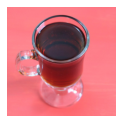


Name: Almond Chocolate Coffee (Alcoholic)
Suggested Glass: Coffee mug

Ingredients:
- 3/4 oz Amaretto
- 1/2 oz Dark Creme de Cacao
- 8 oz Coffee

Instructions:
1. Pour in order into coffee cup
2. Top with whipped creme and chocolate shcvings

Press any key to continue | Enter q to quit:  



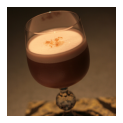


Name: Cafe Savoy (Alcoholic)
Suggested Glass: Coffee mug

Ingredients:
- Coffee
- 1/2 oz Milk
- 1/2 oz Triple sec
- Brandy

Instructions:
1. Fill mug almost to top with coffee
2. Add milk, triple sec and brandy
3. Stir

Press any key to continue | Enter q to quit:  



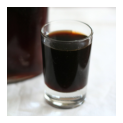


Name: Coffee Liqueur (Alcoholic)
Suggested Glass: Collins Glass

Ingredients:
- 10 tblsp instant Coffee
- 4 tblsp Vanilla extract
- 2 1/2 cups Sugar
- 1 qt Vodka
- 2 1/2 cups Water

Instructions:
1. Combine coffee, sugar and water
2. Simmer 1 hour and let cool
3. Add vanilla and vodka
4. Age in sealed jar 2 to 3 weeks

Press any key to continue | Enter q to quit: g



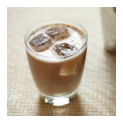


Name: Coffee-Vodka (Alcoholic)
Suggested Glass: Collins Glass

Ingredients:
- 2 cups Water
- 2 cups white Sugar
- 1/2 cup instant Coffee
- 1/2 Vanilla
- 1 1/2 cup Vodka
- Caramel coloring

Instructions:
1. Boil water and sugar until dissolved
2. Turn off heat
3. Slowly add dry instant coffee and continue stirring
4. Add a chopped vanilla bean to the vodka, then combine the cooled sugar syrup and
   coffee solution with the vodka
5. Cover tightly and shake vigorously each day for 3 weeks
6. Strain and filter
7. Its also best to let the sugar mixture cool completely so the vodka won't
   evaporate when its added
8. If you like a smoother feel to the liqueur you can add about 1 teaspoon of
   glycerine to the finished product

Press any key to continue | Enter q to quit: s



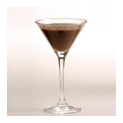


Name: Danbooka (Alcoholic)
Suggested Glass: Coffee Mug

Ingredients:
- 3 parts Coffee
- 1 part Everclear

Instructions:
1. pour it in and mix it

Press any key to continue | Enter q to quit: f



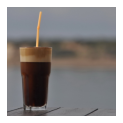


Name: Frappé (Non alcoholic)
Suggested Glass: Highball Glass

Ingredients:
- 1/2 cup black Coffee
- 1/2 cup Milk
- 1-2 tsp Sugar

Instructions:
1. Mix together
2. Blend at highest blender speed for about 1 minute
3. Pour into a glass and drink with a straw
4. Notes: This works best if everything is cold (if you make fresh coffee, mix it
   with the milk and let it sit in the fridge for 1/2 hour
5. If it is not frothy, add more milk, or even just some more milk powder
6. The froth gradually turns to liquid at the bottom of the glass, so you will find
   that you can sit and drink this for about 1/2 hour, with more iced coffee
   continually appearing at the bottom
7. Very refreshing

Press any key to continue | Enter q to quit: w



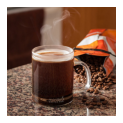


Name: Fuzzy Asshole (Alcoholic)
Suggested Glass: Coffee mug

Ingredients:
- 1/2 Coffee
- 1/2 Peach schnapps

Instructions:
1. fill coffe mug half full of coffee
2. Fill the other half full of Peach Schnapps
3. Stir and drink while hot

Press any key to continue | Enter q to quit: f



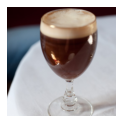


Name: H.D. (Alcoholic)
Suggested Glass: Beer mug

Ingredients:
- 4 cl Whisky
- 8 cl Baileys irish cream
- Coffee

Instructions:
1. Mix the whisky and Baileys Cream in a beer-glass (at least 50 cl)
2. Fill the rest of the glass with coffee

Press any key to continue | Enter q to quit: q

Select an option:

1 - Drink by Name
2 - Drink by Ingredients
3 - Random Drink
4 - Brewery Info
q - Quit

-> 2

Enter ingredient | Enter 0 for avaiable ingredients: 0

Gathering ingredients...

7-Up | Absolut Citron | Ale | Amaretto | Angelica root | Apple brandy | Apple
cider | Apple juice | Applejack | Apricot brandy | Añejo rum | Berries | Bitters
| Blackberry brandy | Blended whiskey | Bourbon | Brandy | Cantaloupe |
Carbonated water | Champagne | Cherry brandy | Chocolate | Chocolate liqueur |
Chocolate syrup | Cider | Cocoa powder | Coffee | Coffee brandy | Coffee liqueur
| Cognac | Cranberries | Cranberry juice | Creme de Cacao | Creme de Cassis |
Dark rum | Dry Vermouth | Dubonnet Rouge | Egg |

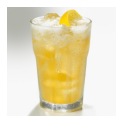


Name: Absolut Summertime (Alcoholic)
Suggested Glass: Collins glass

Ingredients:
- 1 1/2 oz Absolut Citron
- 3/4 oz Sweet and sour
- 1/2 oz Sprite
- 3 oz Soda water
- 1 slice Lemon

Instructions:
1. Add all ingredients except lemon to shaker filled with ice
2. Cover and shake vigorously
3. Strain contents into ice filled collins glass
4. Garnish with lemon

Press any key to continue | Enter q to quit: s



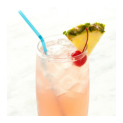


Name: Downshift (Alcoholic)
Suggested Glass: Hurricane glass

Ingredients:
- 2 part Fruit punch
- 1 part Sprite
- 2 shots Tequila
- Float Bacardi 151 proof rum

Instructions:
1. Start with the Sprite
2. Next comes the tequila
3. After that, add the Minute Maid Fruit Punch, then float the 151
4. Rocks optional

Press any key to continue | Enter q to quit: w



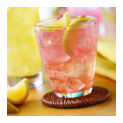


Name: Pink Panty Pulldowns (Alcoholic)
Suggested Glass: Collins Glass

Ingredients:
- 1 L Sprite
- 2 cups Pink lemonade
- 2 cups Vodka

Instructions:

Press any key to continue | Enter q to quit: q

Select an option:

1 - Drink by Name
2 - Drink by Ingredients
3 - Random Drink
4 - Brewery Info
q - Quit

-> 1

Enter drink name or 0 for drink names: Coffee

Mixing Drinks... found 13 drinks



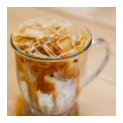


Name: Iced Coffee (Non alcoholic)
Suggested Glass: Coffee mug

Ingredients:
- 1/4 cup instant Coffee
- 1/4 cup Sugar
- 1/4 cup hot Water
- 4 cups cold Milk

Instructions:
1. Mix together until coffee and sugar is dissolved
2. Add milk
3. Shake well
4. Using a blender or milk shake maker produces a very foamy drink
5. Serve in coffee mug

Press any key to continue | Enter q to quit: f



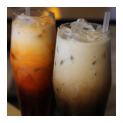


Name: Thai Coffee (Non alcoholic)
Suggested Glass: Highball glass

Ingredients:
- 6 tblsp ground Coffee
- 1/4 tsp Coriander
- 4-5 whole green Cardamom
- Sugar
- Whipping cream
- Ice

Instructions:
1. Place the coffee and spices in the filter cone of your coffee maker
2. Brew coffee as usual, let it cool
3. In a tall glass, dissolve 1 or 2 teaspoons of sugar in an ounce of the coffee
   (it's easier to dissolve than if you put it right over ice)
4. Add 5-6 ice cubes and pour coffee to within about 1 inch of the top of the glass
5. Rest a spoon on top of the coffee and slowly pour whipping cream into the spoon
6. This will make the cream float on top of the coffee rather than dispersing into
   it right away

Press any key to continue | Enter q to quit: q

Select an option:

1 - Drink by Name
2 - Drink by Ingredients
3 - Random Drink
4 - Brewery Info
q - Quit

-> 2

Enter ingredient | Enter 0 for avaiable ingredients: Whiskey

Mixing Drinks... found 2 drinks

Enter another ingredient | 

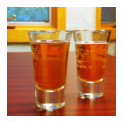


Name: Damned if you do (Alcoholic)
Suggested Glass: Shot glass

Ingredients:
- 0.75 oz Whiskey
- 0.25 oz Hot Damn

Instructions:
1. Pour into shot glass
2. Put in mouth
3. Repeat as deemed necessary

Press any key to continue | Enter q to quit: e



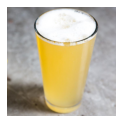


Name: Owen's Grandmother's Revenge (Alcoholic)
Suggested Glass: Highball glass

Ingredients:
- 12 oz Whiskey
- 12 oz Beer
- 12 oz frozen Lemonade
- 1 cup crushed Ice

Instructions:
1. Add ingredients and mix in blender

Press any key to continue | Enter q to quit: q

Select an option:

1 - Drink by Name
2 - Drink by Ingredients
3 - Random Drink
4 - Brewery Info
q - Quit

-> 2

Enter ingredient | Enter 0 for avaiable ingredients: Rum

Mixing Drinks... found 22 drinks

Enter another ingredient | Enter q to process:  
Not a valid ingredient.

7-Up | Absolut Citron | Ale | Amaretto | Angelica root | Apple brandy | Apple
cider | Apple juice | Applejack | Apricot brandy | Añejo rum | Berries | Bitters
| Blackberry brandy | Blended whiskey | Bourbon | Brandy | Cantaloupe |
Carbonated water | Champagne | Cherry brandy | Chocolate | Chocolate liqueur |
Chocolate syrup | Cider | Cocoa powder | Coffee | Coffee brandy | Coffee liqueur
| Cognac | Cranberries | Cranberry juice | Creme de Cacao | Cr

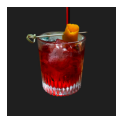


Name: Adam Bomb (Alcoholic)
Suggested Glass: Margarita/Coupette glass

Ingredients:
- 1 part Rum
- 1 part Vodka
- 1 part Tequila
- 1/2 part Triple sec
- Fruit
- Ice
- 1-3 pint Salt
- Fruit juice

Instructions:
1. Add ice to blender (or to glass if prefer on the rocks) then fruit, and fruite
   juice depending on personal prefference then add the Rum, Vodka, Tequila, and
   triple sec
2. blend till smooth, rim glass with sugar or salt and pour mixture in
3. garnish with lemon or lime slice

Press any key to continue | Enter q to quit: v



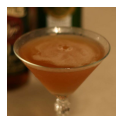


Name: Adios Amigos Cocktail (Alcoholic)
Suggested Glass: Martini Glass

Ingredients:
- 1 shot Rum
- 1/2 shot Dry Vermouth
- 1/2 shot Cognac
- 1/2 shot Gin
- 1/4 shot Fresh Lime Juice
- 1/4 shot Sugar Syrup
- 1/2 shot Water

Instructions:
1. Shake together all the ingredients and strain into a cold glass


In [ ]:
main()

### Step 3: Your Comments

Any last words or comments about your code submission? Add anything here you feel will be helpful for us to make a proper evaluation of your code project submission. This should include, but not be limited to, any changes you made to your project between P2 and P3 which we would be unaware of and the reasons those changes we made.

`--== Double-click and place your comments below  ==--`

I added the 4th feature 'Brewery Info'. This uses a different API that gathers information from the internet about the breweries. I worked very hard on this program and I hope that you enjoy it. I worked with a tutor who helped me with writing the main part of the code and helped me with little things here and there. I am pleased with how it turned out, and I am excited for you to take a look at it. I really need a good grade on this to get up to a B in this class. I hope that you are pleased with it as much as I am! Thank you for a great class!

In [200]:
# SAVE YOUR WORK FIRST! CTRL+S
# RUN THIS CODE CELL TO TURN IN YOUR WORK!
from ist256.submission import Submission
Submission().submit()

=== SUMBISSON DETAILS ===
Your Netid......... djgrosso
Your Instructor.... dlnosky
Assigment Name .... P3.ipynb
Assignment Type ... Unknown
Submission Date ... 2020-12-07 01:55:12 PM
Due Date .......... 2020-12-07 11:59:00 PM

=== SUBMITTING  ===
Uploading: P3.ipynb
To: dlnosky/project/P3.ipynb/djgrosso.ipynb ...
Done!
Reciept: 7a016129aa220efd38d8336d707e7fd9
